In [14]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Reference:
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [2]:
!curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1748  100  1748    0     0   2833      0 --:--:-- --:--:-- --:--:--  2828


In [3]:
df = pd.read_csv('AirPassengers.csv')

df.head(5)

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


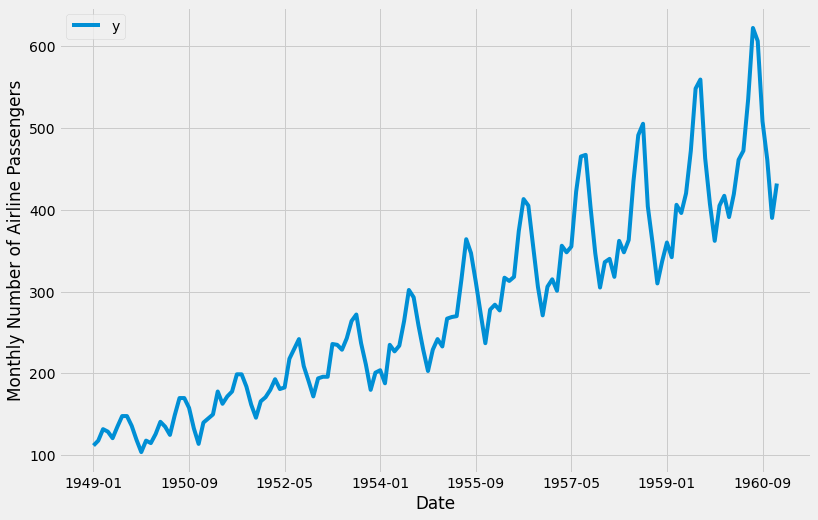

In [5]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [7]:
df.set_index('ds')

,y
ds,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [8]:
my_model = Prophet(interval_width=0.98)

In [9]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [11]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.883028,601.092872,703.586074
176,1963-09-01,602.568248,552.210123,652.936313
177,1963-10-01,566.378241,513.343295,616.796680
178,1963-11-01,534.518077,480.037185,581.442481
179,1963-12-01,564.116221,515.159502,616.892257


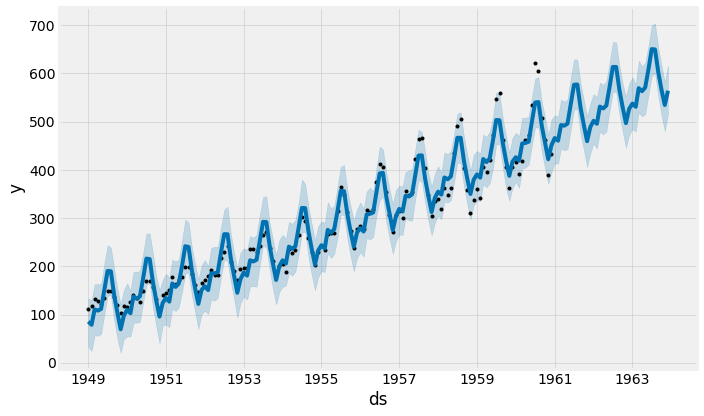

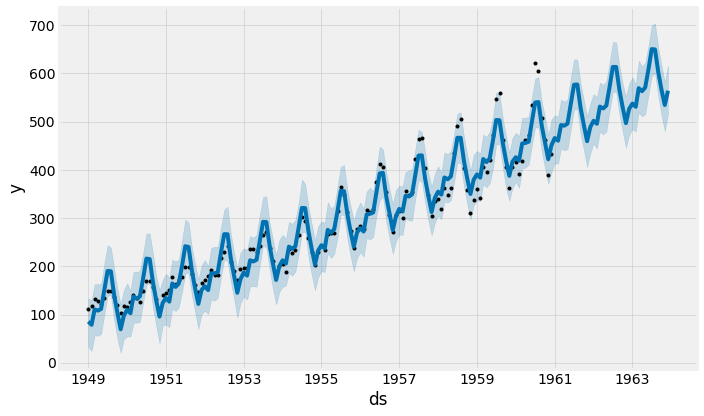

In [12]:
my_model.plot(forecast,uncertainty=True)

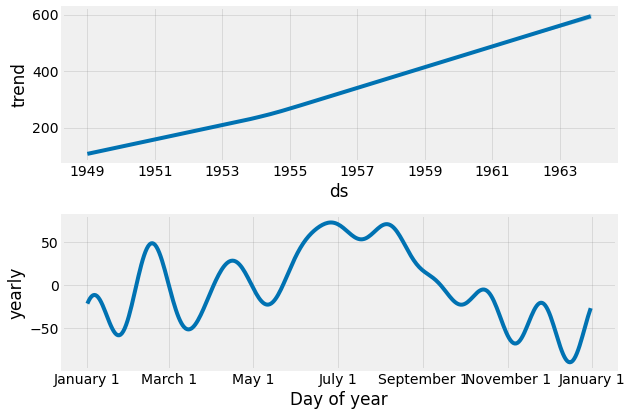

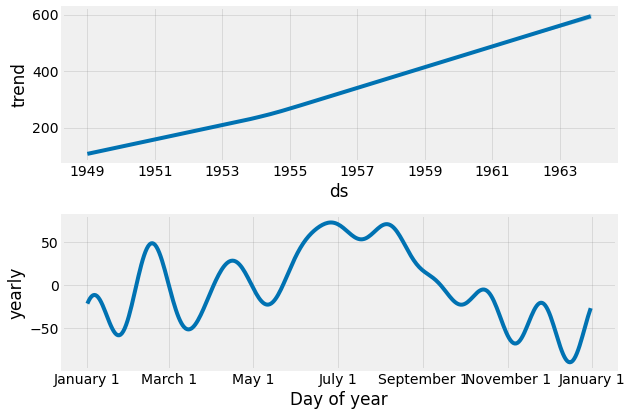

In [13]:
my_model.plot_components(forecast)